In [ ]:
import numpy as np
from scipy import stats

X = [10, 17, 23, 20, 21, 24, 22, 20, 20, 9, 19, 25, 30]
X

[10, 17, 23, 20, 21, 24, 22, 20, 20, 9, 19, 25, 30]

In [ ]:
mean = np.mean(X)
mean

20.0

In [ ]:
median = np.median(X)
median

20.0

In [ ]:
mode = stats.mode(X)
print("Mode is: " + str(mode[0][0]) + "\tNumber of occurences: " + str(mode[1][0]))

Mode is: 20	Number of occurences: 3


In [ ]:
X = [10, 17, 23, 20, 21, 24, 22, 20, 20, 9, 19, 25, 30]
n = len(X) 
sum_x = sum(X) 
mean = sum_x / n
print('Mean is ' + str(mean))

Mean is 20.0


In [ ]:
X = [10, 17, 23, 20, 21, 24, 22, 20, 20, 9, 19, 25, 30]
X.sort() 

# position of the median
if n % 2 == 0:
   m1 = X[n // 2]
   m2 = X[n // 2 - 1]
   median_x = (m1 + m2)/2
else:
   median = X[n // 2]

print('Median is ' + str(median))

Median is 20


In [ ]:
import collections

# frequency of each item
data = collections.Counter(X)
data_dict = dict(data)

#keys
data_dict.keys()
#values
data_dict.values()
#key-value pairs
data_dict.items()

# maximum frequency
max_freq = max(data_dict.values())

for num, freq in data_dict.items():
    if freq == max_freq:
        print('Mode is ' + str(num))

Mode is 20


In [ ]:
#by using numpy
X = [10, 17, 23, 20, 21, 24, 22, 20, 20, 9, 19, 25, 30]

Q1 = np.percentile(X, 25, interpolation = 'midpoint') 
  
# Third quartile (Q3) 
Q3 = np.percentile(X, 75, interpolation = 'midpoint') 
  
# Interquaritle range (IQR) 
IQR = Q3 - Q1
print(IQR)

4.0


In [ ]:
#by using scipy
IQR = stats.iqr(X, interpolation = 'midpoint') 
print(IQR)

4.0


In [ ]:
#importing file
import pandas as pd
#connect to Google Drive
from google.colab import drive
drive.mount("/content/gdrive")
data = pd.read_csv('/content/gdrive/My Drive/training_data/titanic_dataset.csv')

data.head(10)

Mounted at /content/gdrive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


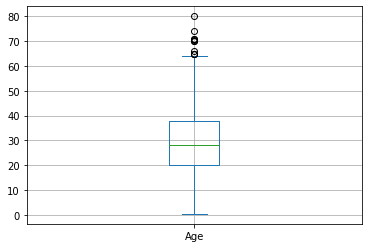

In [ ]:
bp_age = pd.DataFrame(data, columns = ['Age'])
bp_age.plot.box(grid='True')

#there are 4 outliers visible

In [ ]:
#outlier ditection
def show_outliers(col_name, df_in):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (df_in[col_name] < lower_bound) | (df_in[col_name] > upper_bound)
    df_out = df_in.loc[outliers]
    
    return df_out

out = show_outliers('Age', data)
out

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


In [ ]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'X': [5, 15, 55, 66], 'Y': [4, 21, 87, 96]})
df.head()

,X,Y
0,5,4
1,15,21
2,55,87
3,66,96


In [ ]:
#Covariance
print(df.cov())

             X            Y
X   886.916667  1374.666667
Y  1374.666667  2142.000000


In [ ]:
#Correlation
round(np.corrcoef(df['X'],df['Y'])[0, 1], 4)

0.9973

In [ ]:
# function for covariance
def cov_func(a, b):
    a_mean = np.mean(a) 
    b_mean = np.mean(b)
    n = len(a)
    sum = 0 
    for i in range(0, n): 
        sum = sum + ((a[i] - a_mean) * (b[i] - b_mean)) 
    return sum/(n - 1)

# function for variance
def var_func(a):
    a_mean = np.mean(a)
    n = len(a)
    sum = 0 
    for i in range(0, n): 
        sum = sum + ((a[i] - a_mean) ** 2) 
    return sum/(n - 1)

# function for correlation
def corr_func(a, b):
    return cov_func(a, b) / (np.sqrt(var_func(a)) * np.sqrt(var_func(b))) 

In [ ]:
print('Variance X: ' + str(round(var_func(df['X']),2)))
print('Variance Y: ' + str(round(var_func(df['Y']),2)))
print('Covariance (X,Y): ' + str(round(cov_func(df['X'], df['Y']),2)))
print('Correlation (X,Y): ' + str(round(corr_func(df['X'], df['Y']),4)))

Variance X: 886.92
Variance Y: 2142.0
Covariance (X,Y): 1374.67
Correlation (X,Y): 0.9973


Impute Missing Values

In [ ]:
import pandas as pd

df = pd.read_csv('/content/gdrive/My Drive/training_data/titanic_dataset.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
def fill_missing_values(col_name, data):
    for i in range(len(data)):
        data[col_name] = data[col_name].fillna(data[col_name].median())
        return data
    
data = fill_missing_values('Age', df)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# seed random number generator
np.random.seed(1)

In [ ]:
#Random Number Generation from ~ N(0,1)
# prepare data
X = 10 * np.random.randn(1000000) + 80
Y = X + (5 * np.random.randn(1000000) + 40)